In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

model_save_path = './PredictModel/vietnam_covid_predict.hdf5'
DATA_PATH = [
    './Data/1_DataSet.csv', 
    './Data/2_DataSet.csv',
    './Data/3_DataSet.csv'
]

# Data visualizing

In [2]:
df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df[path] = pd.read_csv(DATA_PATH[path])
    df[path].drop(df[path].tail(26).index,inplace=True)
    for idx in range(len(df[path].index)):
        df[path].iat[idx, 0] = datetime.strptime(df[path].iat[idx, 0], '%Y-%m-%d %H:%M:%S')
    df[path] = df[path].sort_values(by=['date'])
    df[path] = df[path].drop(columns=['Unnamed: 9'])

In [3]:
df[0].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,13560,5300471.0,0.0,0.0,6.0,22554.0,0.0,0.0
594,2022-04-13 00:00:00,13818,5314289.0,0.0,0.0,2.0,22556.0,0.0,0.0
634,2022-04-14 00:00:00,12824,5327113.0,0.0,0.0,5.0,22561.0,0.0,0.0
197,2022-04-15 00:00:00,11473,5338586.0,0.0,0.0,4.0,22565.0,0.0,0.0
34,2022-04-16 00:00:00,10291,5353757.0,0.0,0.0,2.0,22567.0,0.0,0.0
607,2022-04-17 00:00:00,8521,5361294.0,0.0,0.0,0.0,22567.0,0.0,0.0
591,2022-04-18 00:00:00,7586,5365758.0,0.0,0.0,0.0,22567.0,0.0,0.0
191,2022-04-19 00:00:00,7911,5377027.0,0.0,0.0,3.0,22570.0,0.0,0.0
111,2022-04-20 00:00:00,7266,5384293.0,0.0,0.0,1.0,22571.0,0.0,0.0
485,2022-04-21 00:00:00,6535,5390828.0,0.0,0.0,0.0,22571.0,0.0,0.0


In [4]:
df[1].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,658,604811.0,0.0,0.0,0.0,19984.0,0.0,0.0
594,2022-04-13 00:00:00,848,605659.0,0.0,0.0,0.0,19984.0,0.0,0.0
634,2022-04-14 00:00:00,877,606536.0,0.0,0.0,0.0,19984.0,0.0,0.0
197,2022-04-15 00:00:00,743,607279.0,0.0,0.0,0.0,19984.0,0.0,0.0
34,2022-04-16 00:00:00,603,607882.0,0.0,0.0,0.0,19984.0,0.0,0.0
607,2022-04-17 00:00:00,427,608309.0,0.0,0.0,0.0,19984.0,0.0,0.0
591,2022-04-18 00:00:00,337,608646.0,0.0,0.0,0.0,19984.0,0.0,0.0
191,2022-04-19 00:00:00,557,609203.0,0.0,0.0,0.0,19984.0,0.0,0.0
111,2022-04-20 00:00:00,179,609382.0,0.0,0.0,0.0,19984.0,0.0,0.0
485,2022-04-21 00:00:00,94,609476.0,0.0,0.0,0.0,19984.0,0.0,0.0


In [5]:
df[2].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,781,723021.0,0.0,0.0,0.0,20119.0,0.0,0.0
594,2022-04-13 00:00:00,1017,724038.0,0.0,0.0,0.0,20119.0,0.0,0.0
634,2022-04-14 00:00:00,1028,725066.0,0.0,0.0,0.0,20119.0,0.0,0.0
197,2022-04-15 00:00:00,849,725915.0,0.0,0.0,0.0,20119.0,0.0,0.0
34,2022-04-16 00:00:00,646,726561.0,0.0,0.0,0.0,20119.0,0.0,0.0
607,2022-04-17 00:00:00,427,726988.0,0.0,0.0,0.0,20119.0,0.0,0.0
591,2022-04-18 00:00:00,337,727325.0,0.0,0.0,0.0,20119.0,0.0,0.0
191,2022-04-19 00:00:00,703,728028.0,0.0,0.0,0.0,20119.0,0.0,0.0
111,2022-04-20 00:00:00,248,728276.0,0.0,0.0,0.0,20119.0,0.0,0.0
485,2022-04-21 00:00:00,94,728370.0,0.0,0.0,0.0,20119.0,0.0,0.0


In [6]:
# Summary Stats
df[0].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000
mean,5479.001342,5.136982e+05,289.953020,6690.426846,30.369128,6422.41745,8.875168,1639.928859
std,15521.184400,1.238343e+06,1653.040662,22495.101877,71.894650,8992.14423,37.300498,2406.029420
min,0.000000,3.600000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,7.020000e+02,0.000000,0.000000,0.000000,31.00000,0.000000,29.000000
50%,14.000000,1.169000e+03,0.000000,26.000000,0.000000,31.00000,0.000000,657.000000
75%,3965.000000,4.454460e+05,4.000000,124.000000,30.000000,16750.00000,2.000000,1072.000000
max,93973.000000,5.477821e+06,38559.000000,128636.000000,666.000000,22579.00000,400.000000,6656.000000


In [7]:
# Summary Stats
df[1].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,812.915436,166020.140940,269.308725,6088.205369,26.833557,6100.444295,0.955705,198.409396
std,1642.514718,230037.019851,1636.017589,21442.775651,71.744706,8515.300618,5.012557,240.791912
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,2.000000,254.000000,0.000000,4.000000,0.000000,0.000000,0.000000,78.000000
75%,927.000000,425116.000000,0.000000,21.000000,4.000000,16575.000000,0.000000,242.000000
max,16024.000000,610091.000000,38417.000000,126088.000000,658.000000,19984.000000,81.000000,692.000000


In [8]:
# Summary Stats
df[2].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.00000
mean,974.059060,177816.452349,269.394631,6090.381208,27.014765,6115.998658,0.971812,202.34094
std,1774.976639,252059.912656,1636.039735,21446.637040,71.697888,8540.675690,5.014282,245.16055
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.00000
50%,2.000000,263.000000,0.000000,4.000000,0.000000,0.000000,0.000000,81.00000
75%,1227.000000,425187.000000,0.000000,22.000000,7.000000,16575.000000,0.000000,249.00000
max,16027.000000,729332.000000,38417.000000,126088.000000,658.000000,20119.000000,81.000000,704.00000


In [9]:
df_filtered = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df_filtered[path] = df[path][df[path]['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]

<AxesSubplot:xlabel='date'>

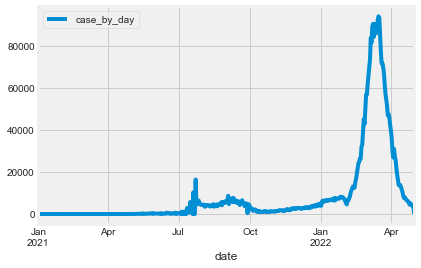

In [10]:
df_filtered[0].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

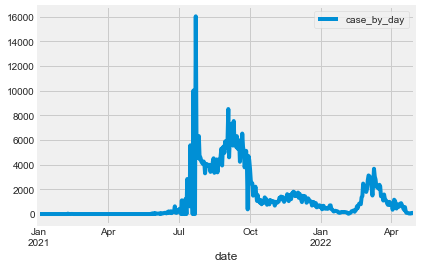

In [11]:
df_filtered[1].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

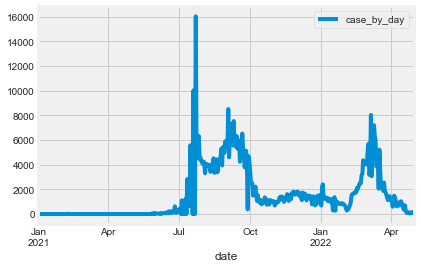

In [12]:
df_filtered[2].plot(x ='date', y='case_by_day', kind = 'line')

# Predicting case by day

In [13]:
new_df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    new_df[path] = df_filtered[path].set_index('date')

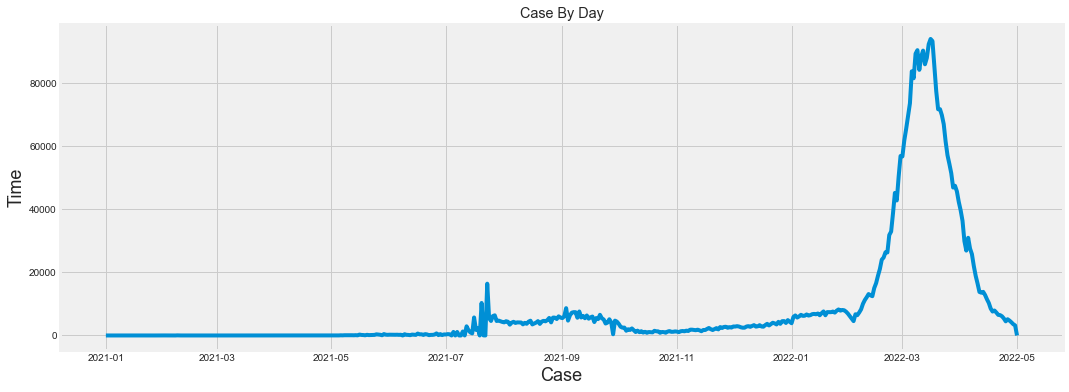

In [14]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[0]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

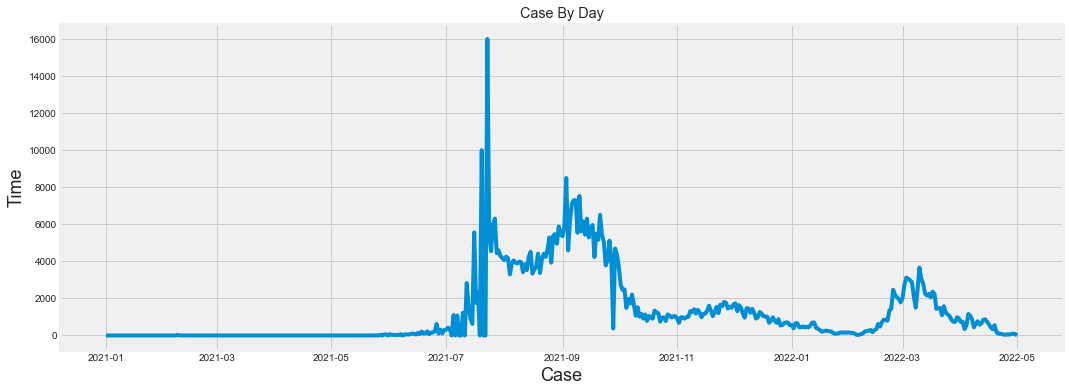

In [15]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[1]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

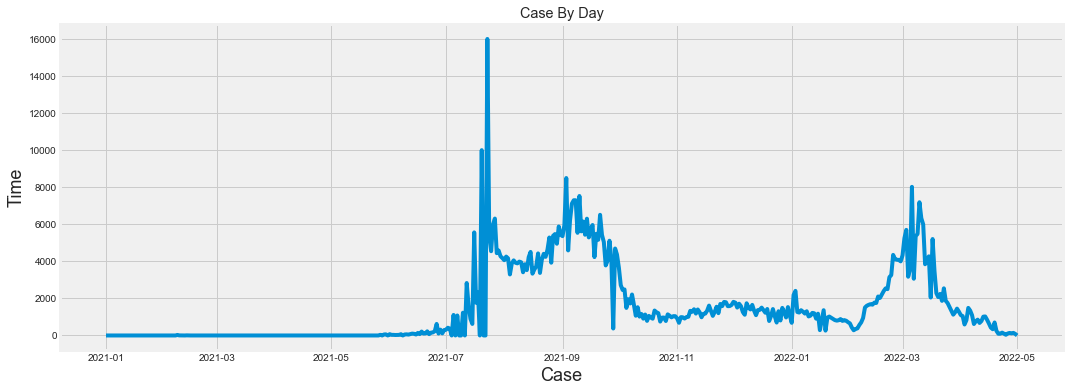

In [16]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[2]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [17]:
data = [None] * len(DATA_PATH)
dataset = [None] * len(DATA_PATH)
training_data_len = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create a new dataframe with only the 'Close column 
    data[path] = new_df[path].filter(['case_by_day'])
    # Convert the dataframe to a numpy array
    dataset[path] = data[path].values
    # Get the number of rows to train the model on
    # training_data_len[path] = int(np.ceil(len(dataset[path]) * .95 ))
    training_data_len[path] = len(dataset[path]) - 30
    print(training_data_len[path])

456
456
456


In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    scaled_data[path] = scaler.fit_transform(dataset[path])

scaled_data

[array([[0.00000000e+00],
        [2.12827089e-05],
        [5.32067722e-05],
        [2.12827089e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.25654177e-05],
        [5.32067722e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [1.06413544e-05],
        [4.25654177e-05],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [2.12827089e-05],
        [0.00000000e+00],
        [8.51308355e-05],
        [2.12827089e-04],
        [1.06413544e-04],
        [1.38337608e-04],
        [1.38337608e-04],
        [1.06413544e-04],
        [5.32067722e-05],
        [3.19240633e-05],
        [4.25654177e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [3.7

In [19]:
DATA_LEN = 60
train_data = [None] * len(DATA_PATH)
test_data = [None] * len(DATA_PATH)
x_train = [None] * len(DATA_PATH)
y_train = [None] * len(DATA_PATH)
x_test = [None] * len(DATA_PATH)
y_test = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create the training data set 
    # Create the scaled training data set
    train_data[path] = scaled_data[path][0:int(training_data_len[path]), :]
    # Split the data into x_train and y_train data sets
    x_train[path] = []
    y_train[path] = []

    for idx in range(DATA_LEN, len(train_data[path])):
        x_train[path].append(train_data[path][idx - DATA_LEN: idx, 0])
        y_train[path].append(train_data[path][idx, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train[path], y_train[path] = np.array(x_train[path]), np.array(y_train[path])

    # Reshape the data
    x_train[path] = np.reshape(x_train[path], (x_train[path].shape[0], x_train[path].shape[1], 1))
    
    # Create the testing data set
    test_data[path] = scaled_data[path][training_data_len[path] - DATA_LEN: , :]
    # Create the data sets x_test and y_test
    x_test[path] = []
    y_test[path] = dataset[path][training_data_len[path]:, :]
    for i in range(DATA_LEN, len(test_data[path])):
        x_test[path].append(test_data[path][i - DATA_LEN: i, 0])

    # Convert the data to a numpy array
    x_test[path], y_test[path] = np.array(x_test[path]), np.array(y_test[path])

    # Reshape the data
    x_test[path] = np.reshape(x_test[path], (x_test[path].shape[0], x_test[path].shape[1], 1 ))
    
x_train, y_train, x_test, y_test

([array([[[0.00000000e+00],
          [2.12827089e-05],
          [5.32067722e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[2.12827089e-05],
          [5.32067722e-05],
          [2.12827089e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[5.32067722e-05],
          [2.12827089e-05],
          [3.19240633e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         ...,
  
         [[8.49712151e-02],
          [8.02996605e-02],
          [7.36381727e-02],
          ...,
          [5.47284858e-01],
          [4.98909261e-01],
          [5.04964192e-01]],
  
         [[8.02996605e-02],
          [7.36381727e-02],
          [6.52421440e-02],
          ...,
          [4.98909261e-01],
          [5.04964192e-01],
          [4.86086429e-01]],
  
         [[7.36381727e-02],
          [6.5242144

In [20]:
from functools import reduce

X_train = x_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_train[1:], x_train[0])
Y_train = y_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_train[1:], y_train[0])
X_test = x_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_test[1:], x_test[0])
Y_test = y_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_test[1:], y_test[0])

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() 
model.add(LSTM(30, return_sequences=True, input_shape=(DATA_LEN, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                4080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,141
Trainable params: 8,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train the model
model.fit(
    X_train, 
    Y_train, 
    batch_size=8, 
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
50/50 [==============================] - 11s 63ms/step - loss: 0.0708 - val_loss: 302269632.0000
Epoch 2/50
50/50 [==============================] - 3s 55ms/step - loss: 0.0310 - val_loss: 302276192.0000
Epoch 3/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0256 - val_loss: 302278432.0000
Epoch 4/50
50/50 [==============================] - 3s 57ms/step - loss: 0.0212 - val_loss: 302278272.0000
Epoch 5/50
50/50 [==============================] - 4s 76ms/step - loss: 0.0212 - val_loss: 302279904.0000
Epoch 6/50
50/50 [==============================] - 3s 64ms/step - loss: 0.0215 - val_loss: 302278944.0000
Epoch 7/50
50/50 [==============================] - 3s 60ms/step - loss: 0.0207 - val_loss: 302279904.0000
Epoch 8/50
50/50 [==============================] - 4s 72ms/step - loss: 0.0204 - val_loss: 302277120.0000
Epoch 9/50
50/50 [==============================] - 4s 73ms/step - loss: 0.0213 - val_loss: 302276032.0000
Epoch 10/50
50/50 [=================

In [24]:
predictions = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Get the models predicted price values
    predictions[path] = model.predict(x_test[path])
    predictions[path] = scaler.inverse_transform(predictions[path])

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions[path] - y_test[path]) ** 2)))
    print(rmse)

13352.359477578118
305.4782448835347
310.3854329208958


In [25]:
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

4/4 [==============================] - 0s 10ms/step - loss: 302278240.0000


In [26]:
train = [None] * len(DATA_PATH)
valid = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    train[path] = data[path][:training_data_len[path]]
    valid[path] = data[path][training_data_len[path]:]
    # valid[path]['case_by_day_predict'] = predictions[path]
    valid[path].insert(1, 'case_by_day_predict', predictions[path])

In [27]:
for path in range(len(DATA_PATH)):
    for idx in range(len(valid[path].index)):
        valid[path].iat[idx, 0] = 0 if valid[path].iat[idx, 0] < 0 else valid[path].iat[idx, 0]
        valid[path].iat[idx, 1] = 0 if valid[path].iat[idx, 1] < 0 else valid[path].iat[idx, 1]

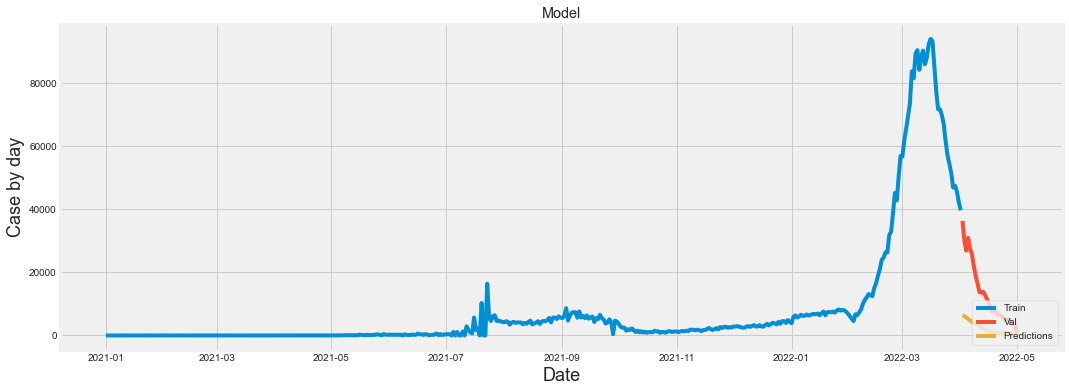

In [28]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[0]['case_by_day'])
plt.plot(valid[0][['case_by_day', 'case_by_day_predict']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
# Show the valid and predicted prices
valid[0]

,case_by_day,case_by_day_predict
date,,
2022-04-02,36314,6388.356934
2022-04-03,29909,6096.656250
2022-04-04,26904,5717.128418
2022-04-05,30954,5232.395020
2022-04-06,27548,4759.912109
2022-04-07,25777,4331.274902
2022-04-08,22033,3963.206299
2022-04-09,18913,3628.510010
2022-04-10,16476,3294.430664


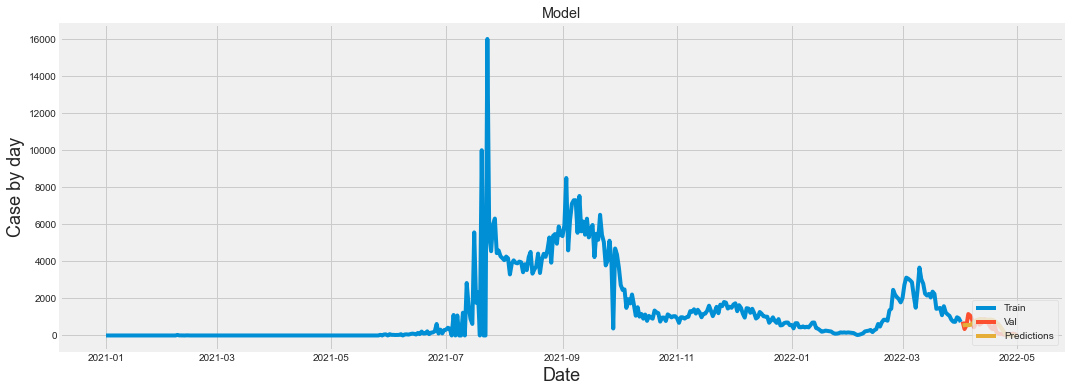

In [30]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[1]['case_by_day'])
plt.plot(valid[1][['case_by_day', 'case_by_day_predict']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
# Show the valid and predicted prices
valid[1]

,case_by_day,case_by_day_predict
date,,
2022-04-02,746,540.768433
2022-04-03,347,561.871094
2022-04-04,537,568.595703
2022-04-05,1158,556.564941
2022-04-06,1075,569.427673
2022-04-07,864,628.671570
2022-04-08,443,721.202026
2022-04-09,636,802.863342
2022-04-10,770,856.120178


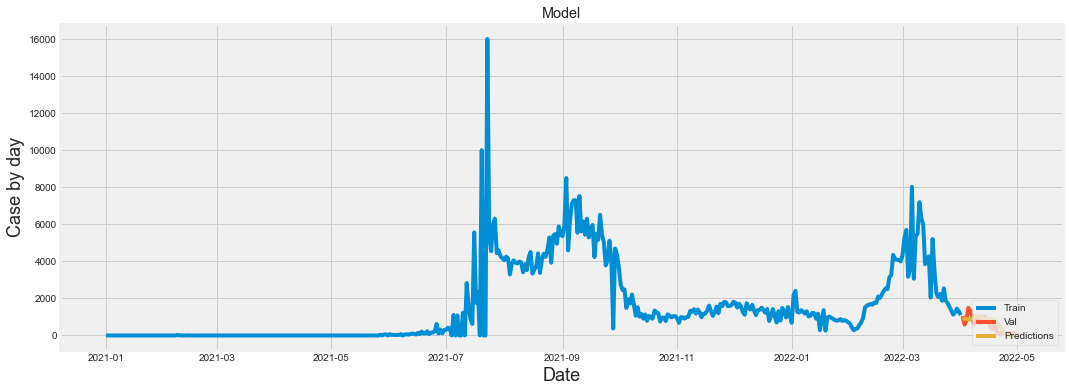

In [32]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[2]['case_by_day'])
plt.plot(valid[2][['case_by_day', 'case_by_day_predict']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid[2]

,case_by_day,case_by_day_predict
date,,
2022-04-02,1048,863.647095
2022-04-03,594,900.436890
2022-04-04,825,903.079651
2022-04-05,1490,872.712646
2022-04-06,1346,863.884094
2022-04-07,1095,901.487305
2022-04-08,620,971.880127
2022-04-09,768,1027.788330
2022-04-10,855,1049.494507


In [34]:
model.save(model_save_path, include_optimizer=False)